# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1

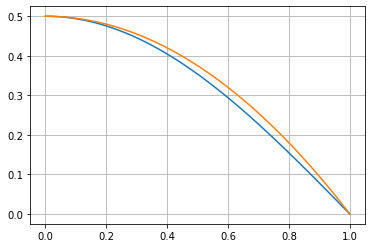

In [37]:
x = np.linspace(0, 1, 1000)
y = 1 / 2 * np.cos(np.pi * x / 2)
y_approx = 1 / 2 * (1-x**2)
plt.plot(x, y)
plt.plot(x, y_approx)
plt.grid()

plt.show()

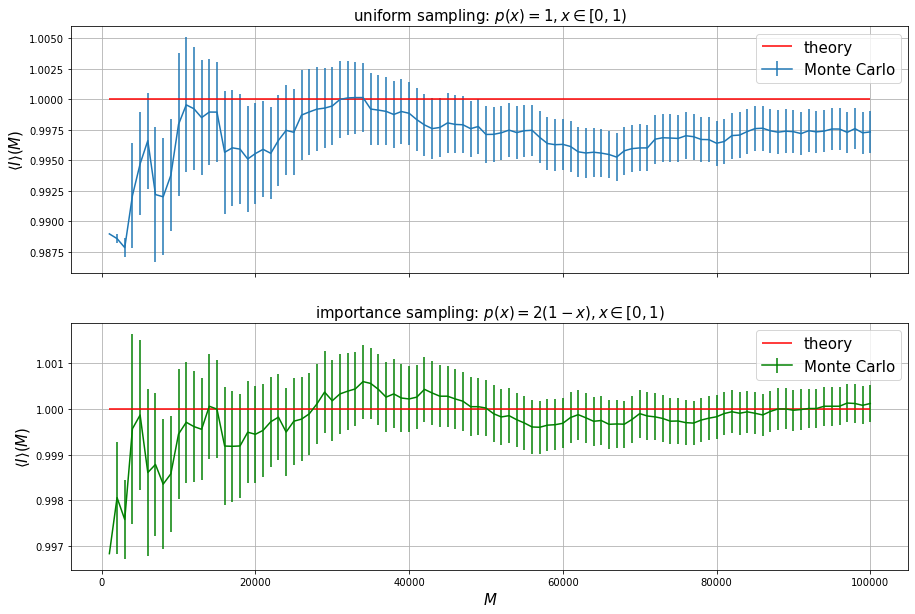

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot calculation using uniform sampling
M_uni, I_uni, error_uni = np.loadtxt("data/I_uniform_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[0].errorbar(M_uni, I_uni, error_uni, label='Monte Carlo')
ax[0].hlines(1, min(M_uni), max(M_uni), color='r', label='theory')
ax[0].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[0].set_title(r"uniform sampling: $p(x) = 1, x \in [0, 1)$", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

# plot calculation using importance sampling
M_imp, I_imp, error_imp = np.loadtxt("data/I_importance_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[1].errorbar(M_imp, I_imp, error_imp, color='green', label='Monte Carlo')
ax[1].hlines(1, min(M_imp), max(M_imp), color='r', label='theory')
ax[1].set_xlabel(r"$M$", size=15)
ax[1].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[1].set_title(r"importance sampling: $p(x) = 2 (1-x), x \in [0, 1)$", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.show()

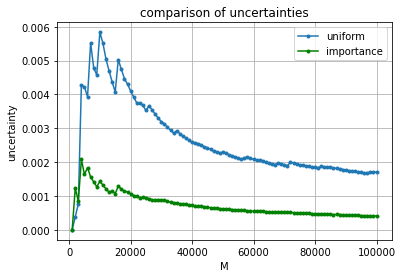

In [47]:
plt.plot(M_uni, error_uni, label='uniform', marker='.')
plt.plot(M_imp, error_imp, color='green', label='importance', marker='.')
plt.xlabel("M")
plt.ylabel("uncertainty")
plt.title("comparison of uncertainties")
plt.grid()
plt.legend()

plt.show()

### Exercise 02.2

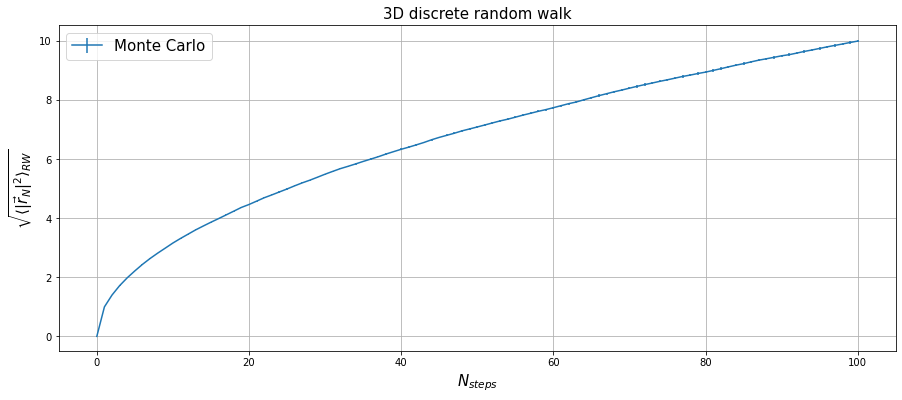

In [29]:
plt.figure(figsize=(15,6))
N_steps, r_mean, r_error = np.loadtxt("data/discrete_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N_steps, r_mean, r_error, label='Monte Carlo')
plt.xlabel(r"$N_{steps}$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D discrete random walk", size=15)
plt.grid()
plt.legend(fontsize=15)

plt.show()

No handles with labels found to put in legend.


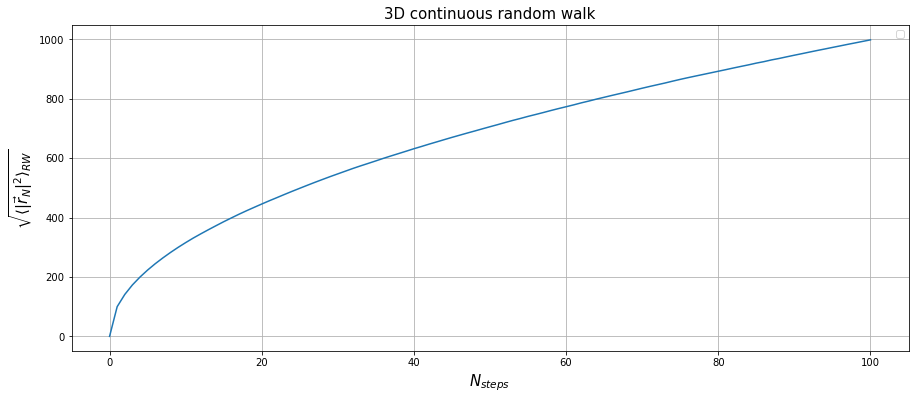

In [24]:
plt.figure(figsize=(15,6))
N_steps, r_mean, r_error = np.loadtxt("data/continuous_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N_steps, r_mean, r_error)
plt.xlabel(r"$N_{steps}$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D continuous random walk", size=15)
plt.grid()
plt.legend()

plt.show()